In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import matplotlib
from scipy import stats
import pylab as pl

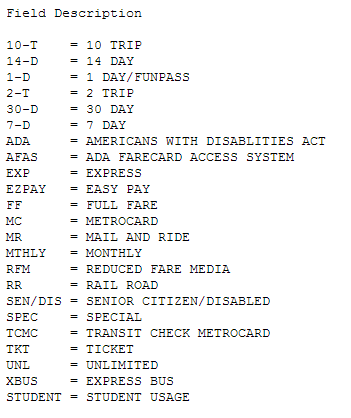

In [2]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

In [3]:
mtafare = np.load('MTA_Fare.npy')

In [4]:
mtafare.shape

(600, 23, 194)

### Task 1:
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [17]:
mtafare

array([[[56961, 64703, 68002, ..., 36527, 33929, 36824],
        [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
        [  203,   276,   245, ...,   186,   167,   167],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [   -1,    -1,    -1, ...,  1121,  1377,   712]],

       [[16210, 20179, 21769, ...,    -1,    -1,    -1],
        [  503,   647,   665, ...,    -1,    -1,    -1],
        [   41,    43,    44, ...,    -1,    -1,    -1],
        ..., 
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [   -1,    -1,    -1, ...,    -1,    -1,    -1]],

       [[ 3292,  3429,  3629, ...,  3746,  3406,  3217],
        [  110,    92,   102, ...,   212,   209,   211],
        [    7,     6,    13, ...,    26,    20,    22],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0, 

In [64]:
# -1?? 
mtafare = mtafare.astype('float')
mtafare[mtafare == -1] = np.NAN

In [65]:
mtafare

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [66]:
#np.nansum?
mtarides = np.nansum(mtafare, axis=1, dtype=None, out=None, keepdims=False)

In [67]:
mtarides

array([[ 126878.,  149477.,  152383., ...,   78901.,   74591.,   76833.],
       [  37306.,   46464.,   49359., ...,       0.,       0.,       0.],
       [   6606.,    6881.,    7229., ...,    8171.,    7907.,    6790.],
       ..., 
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.]])

In [68]:
mta_t = mtarides.transpose()

In [69]:
mta_t.shape

(194, 600)

In [70]:
mta_rides = pd.DataFrame(mta_t)
mta_rides

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,126878.0,37306.0,6606.0,16378.0,18564.0,19987.0,12449.0,11091.0,10482.0,147187.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,149477.0,46464.0,6881.0,17408.0,19903.0,20625.0,13644.0,11659.0,11030.0,154826.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,152383.0,49359.0,7229.0,17595.0,19948.0,21225.0,13719.0,12037.0,10881.0,155958.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,160175.0,44849.0,5731.0,14242.0,16076.0,17412.0,11460.0,9809.0,9123.0,154914.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,162641.0,41509.0,7032.0,17589.0,20283.0,20909.0,14094.0,11944.0,10923.0,157628.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,156414.0,35654.0,5107.0,13168.0,14601.0,15589.0,10295.0,8586.0,8017.0,150259.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,159156.0,41989.0,5497.0,14510.0,16151.0,17187.0,11504.0,9774.0,8963.0,155082.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,159374.0,41909.0,5668.0,14388.0,16066.0,16897.0,11519.0,9651.0,8629.0,156879.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,163285.0,41214.0,5555.0,14221.0,16205.0,16952.0,11449.0,9821.0,8844.0,155849.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,159252.0,41142.0,6942.0,17180.0,19619.0,20563.0,13546.0,11568.0,10578.0,157010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
mta_mean = np.nanmean(mtarides)
mta_mean

49635.5831185567

In [72]:
mta_std = np.nanstd(mtarides)
mta_std

69320.333342510829

In [73]:
interval = [mta_mean - (3*mta_std), mta_mean + (3*mta_std) ]
interval

[-158325.41690897578, 257596.58314608919]

### Task 2:
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [74]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [89]:
cardrides = np.nansum(mtafare, axis=0, dtype=None, out=None, keepdims=False)
cardrides.shape

(23, 194)

In [90]:
cardrides.transpose()

array([[  1.14946150e+07,   5.30524000e+05,   4.78010000e+04, ...,
          6.12800000e+03,   3.58000000e+02,   0.00000000e+00],
       [  1.25268590e+07,   5.83533000e+05,   5.14860000e+04, ...,
          6.12000000e+03,   4.74000000e+02,   0.00000000e+00],
       [  1.27666270e+07,   5.86194000e+05,   5.16360000e+04, ...,
          6.49000000e+03,   4.65000000e+02,   0.00000000e+00],
       ..., 
       [  1.31896100e+07,   6.95134000e+05,   5.87710000e+04, ...,
          5.39800000e+03,   8.62000000e+02,   1.13272300e+06],
       [  1.25007560e+07,   6.70228000e+05,   5.65250000e+04, ...,
          5.75900000e+03,   8.10000000e+02,   1.37940300e+06],
       [  1.24599470e+07,   6.79497000e+05,   5.51920000e+04, ...,
          6.18400000e+03,   8.20000000e+02,   5.35018000e+05]])

In [84]:
cardrides.shape

(23, 194)

In [91]:
card_rides = pd.DataFrame(cardrides)
card_rides

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
0,11494615.0,12526859.0,12766627.0,12653675.0,12809694.0,11429783.0,12346877.0,12576759.0,12437115.0,12431257.0,...,14604028.0,11344945.0,11223430.0,12864865.0,12904811.0,11932970.0,13139360.0,13189610.0,12500756.0,12459947.0
1,530524.0,583533.0,586194.0,562602.0,548858.0,455691.0,518187.0,513412.0,512192.0,522569.0,...,781529.0,596341.0,518956.0,664531.0,744990.0,613294.0,713717.0,695134.0,670228.0,679497.0
2,47801.0,51486.0,51636.0,52063.0,51153.0,46852.0,48963.0,49629.0,49030.0,50376.0,...,62658.0,50820.0,45153.0,56129.0,60429.0,51664.0,57208.0,58771.0,56525.0,55192.0
3,186551.0,199229.0,199668.0,196389.0,194883.0,175648.0,188467.0,188090.0,186822.0,190528.0,...,193268.0,164607.0,148652.0,177885.0,193547.0,168932.0,189564.0,184239.0,180029.0,179363.0
4,46808.0,64353.0,56994.0,37429.0,35210.0,46849.0,60225.0,47439.0,32084.0,52171.0,...,56671.0,22623.0,25301.0,67713.0,64867.0,43426.0,47804.0,61101.0,59400.0,46859.0
5,3697443.0,3981808.0,4033030.0,4032753.0,3925446.0,3663144.0,3918104.0,4028251.0,4030717.0,4032340.0,...,6388538.0,5230565.0,5332925.0,5260402.0,5427174.0,4970067.0,5511613.0,5599237.0,5551292.0,5405077.0
6,8551937.0,9486394.0,9476538.0,9450081.0,9294002.0,8286803.0,9271413.0,9306575.0,9145852.0,8906117.0,...,8482329.0,5824244.0,5891719.0,8264586.0,8838798.0,8250357.0,9446638.0,9309259.0,9030595.0,8705150.0
7,10063.0,11847.0,12277.0,11221.0,10515.0,10282.0,11361.0,10950.0,10723.0,10574.0,...,4.0,1.0,1.0,3.0,5.0,2.0,2.0,2.0,3.0,0.0
8,333197.0,282755.0,302028.0,305513.0,335780.0,346683.0,310387.0,345722.0,348569.0,364363.0,...,4.0,3.0,6.0,4.0,2.0,2.0,6.0,0.0,5.0,3.0
9,512032.0,578023.0,615537.0,606270.0,563446.0,540555.0,611962.0,653871.0,658757.0,651734.0,...,0.0,1.0,2.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0


### Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)